### Предобработка данных

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sessions = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv') 
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
sessions.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Таблица `sessions` (лог сервера с информацией о посещениях сайта):

- **User Id** — уникальный идентификатор пользователя
- **Device** — категория устройства пользователя
- **Session start** — дата и время начала сессии
- **Session End** — дата и время окончания сессии
- **Channel** — идентификатор рекламного источника, из которого пришел пользователь
- **Region** - страна пользователя

In [4]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Таблица `orders` (информация о заказах):

- **User Id** — уникальный id пользователя, который сделал заказ
- **Event Dt** — дата и время покупки
- **Revenue** — выручка

In [5]:
ad_costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Таблица `ad_costs` (информация о затратах на маркетинг):

- **Channel** — идентификатор рекламного источника
- **Dt** — дата
- **Costs** — затраты на этот рекламный источник в этот день

In [6]:
for df in [sessions, orders, ad_costs]: #цикл приводит названия колонок к нижнему регистру и меняет тип данных в колонках с датой
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for name in df.columns:
        if 'start' in name or 'end' in name or 'dt' in name:
            df[name] = pd.to_datetime(df[name])

In [7]:
sessions.info()
sessions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [8]:
ad_costs.info()
ad_costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [9]:
ad_costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [10]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [11]:
orders.describe()

,user_id,revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


### Функции для расчета и анализа LTV, ROI, удержания и конверсии


#### Функция для создания профилей

In [12]:
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
 # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    
    ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
# делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
# добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
   
    
    
    return profiles  # возвращаем профили с CAC

#### Функция для расчёта удержания

In [13]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчёта конверсии

In [14]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчёта LTV и ROI

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для сглаживания фрейма

In [16]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для визуализации удержания

In [17]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция для визуализации конверсии

In [18]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 8))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI

In [19]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3,2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

Построим профили пользователей. 

In [20]:
profiles = get_profiles(sessions, orders, ad_costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную дату привлечения пользователей.

In [21]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [22]:
report = profiles.groupby('region').agg({'user_id': 'count', 'payer': ['sum', 'mean']})
report.columns = ['Пользователи', 'Платящие пользователи', '% платящих пользователей']
report.sort_values(by='% платящих пользователей', ascending=False).style.format({'Платящие пользователи': '{:.0f}',
                                                                    '% платящих пользователей': '{:.2f}'})

,Пользователи,Платящие пользователи,% платящих пользователей
region,,,
United States,100002,6902,0.07
Germany,14981,616,0.04
UK,17575,700,0.04
France,17450,663,0.04


In [23]:
report = profiles.groupby('device').agg({'user_id': 'count', 'payer': ['sum', 'mean']})
report.columns = ['Пользователи', 'Платящие пользователи', '% платящих пользователей']
report.sort_values(by='Пользователи', ascending=False).style.format({'Платящие пользователи': '{:.0f}',
                                                                    '% платящих пользователей': '{:.2f}'})

,Пользователи,Платящие пользователи,% платящих пользователей
device,,,
iPhone,54479,3382,0.06
Android,35032,2050,0.06
PC,30455,1537,0.05
Mac,30042,1912,0.06


In [24]:
report = profiles.groupby('channel').agg({'user_id': 'count', 'payer': ['sum', 'mean']})
report.columns = ['Пользователи', 'Платящие пользователи', '% платящих пользователей']
report.sort_values(by='Пользователи', ascending=False).style.format({'Платящие пользователи': '{:.0f}',
                                                                    '% платящих пользователей': '{:.2f}'})

,Пользователи,Платящие пользователи,% платящих пользователей
channel,,,
organic,56439,1160,0.02
FaceBoom,29144,3557,0.12
TipTop,19561,1878,0.10
OppleCreativeMedia,8605,233,0.03
LeapBob,8553,262,0.03
WahooNetBanner,8553,453,0.05
RocketSuperAds,4448,352,0.08
MediaTornado,4364,156,0.04
YRabbit,4312,165,0.04


#### Вывод

Мы посмотрели на базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения:
 - Определили основной рынок. Больше всего приходит пользователей из США и они лучше других конвертируется, при этом большая часть пользователей заходит с мобильных устройств, это тоже стоит отметить;
 - Наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. в целом пользователи Apple имеют лучшую конверсию в покупателей;
 - Больше всего пользователей было привлечено через  FaceBoom и TipTop.


### Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [25]:
print('Всего затрат на рекламу:', profiles.query('channel != "organic"')['acquisition_cost'].sum())
print('Средняя стоимость привлечения одного пользователя:', 
      round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2))

Всего затрат на рекламу: 105497.3
Средняя стоимость привлечения одного пользователя: 1.13


In [26]:
report = profiles.groupby('channel').agg({'user_id': 'nunique', 'acquisition_cost': ['sum', 'mean']})
report.columns = ['Пользователи', 'Всего израсходовано', 'В среднем на пользователя']
report['% от общих затрат'] = report['Всего израсходовано'] / report['Всего израсходовано'].sum() * 100

report = report.sort_values(by='% от общих затрат', ascending=False).reset_index().style.format(
    {'В среднем на пользователя': '{:.2f}',
    '% от общих затрат': '{:.2f}'})

report
    

,channel,Пользователи,Всего израсходовано,В среднем на пользователя,% от общих затрат
0,TipTop,19561,54751.300000,2.80,51.90
1,FaceBoom,29144,32445.600000,1.11,30.75
2,WahooNetBanner,8553,5151.000000,0.60,4.88
3,AdNonSense,3880,3911.250000,1.01,3.71
4,OppleCreativeMedia,8605,2151.250000,0.25,2.04
5,RocketSuperAds,4448,1833.000000,0.41,1.74
6,LeapBob,8553,1797.600000,0.21,1.70
7,lambdaMediaAds,2149,1557.600000,0.72,1.48
8,MediaTornado,4364,954.480000,0.22,0.90
9,YRabbit,4312,944.220000,0.22,0.90


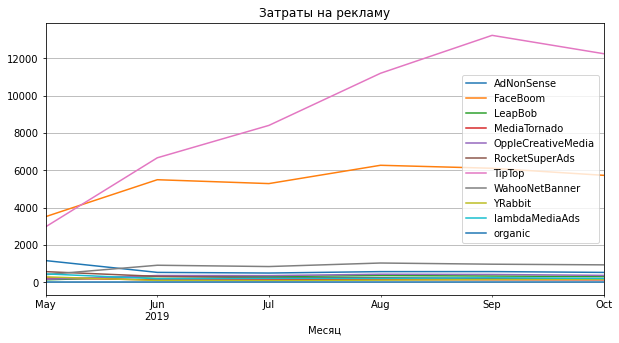

In [27]:
profiles.pivot_table(index='channel', 
    columns='month', 
    values='acquisition_cost', 
    aggfunc='sum'
).T.plot(figsize=(10, 5), grid=True)

plt.legend()
plt.xlabel('Месяц')
plt.title('Затраты на рекламу')
plt.show()


Как по общим затратам, так и по стоимости привлечения пользователя лидирует канал TipTop. Треть затрат приходится на канал FaceBoom, но стоимость привлечения пользователя значительно ниже. График показывает, что затраты на рекламу в самом дорогостящем канале TipTop постоянно и значительно увеличивались, а в FaceBoom были выше, чем в других каналах, но стабильны.

### Оценка окупаемости рекламы для привлечения пользователей

#### Общая окупаемость рекламы

In [28]:
observation_date = max_date 
horizon_days = 14
ad_users = profiles.query('channel != "organic"') #исключим из таблицы пользователей, пришедших без рекламы

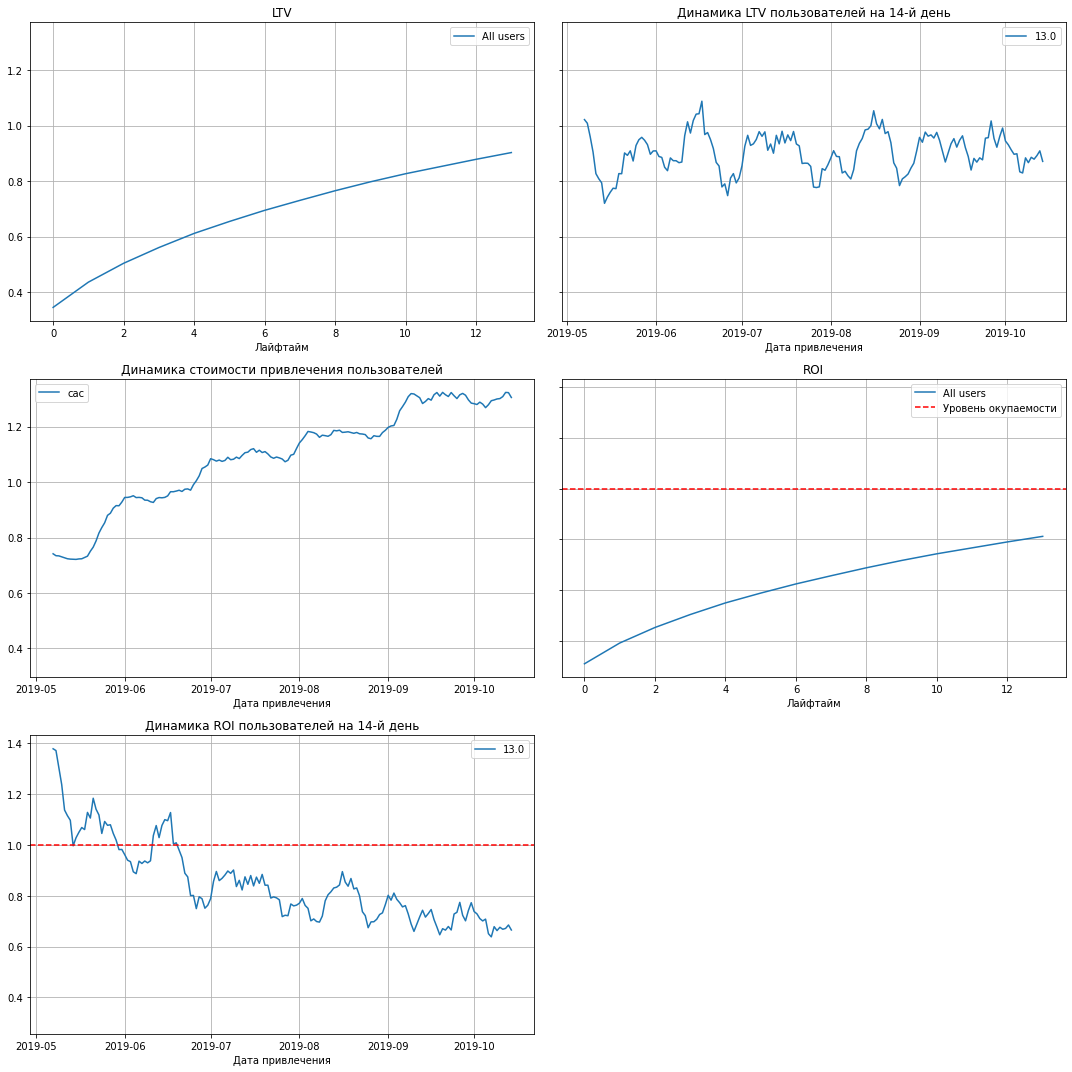

In [29]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_users, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI на 14 день — чуть выше 80%
- В июне резко выросли затраты на рекламу, в это же время показатель ROI пользователей резко снизился. 
- С июля пользователь перестали окупаться
- LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей
- в изменении САС наблюдается скачкообразное повышение

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

#### Окупаемость рекламы с разбивкой по устройствам

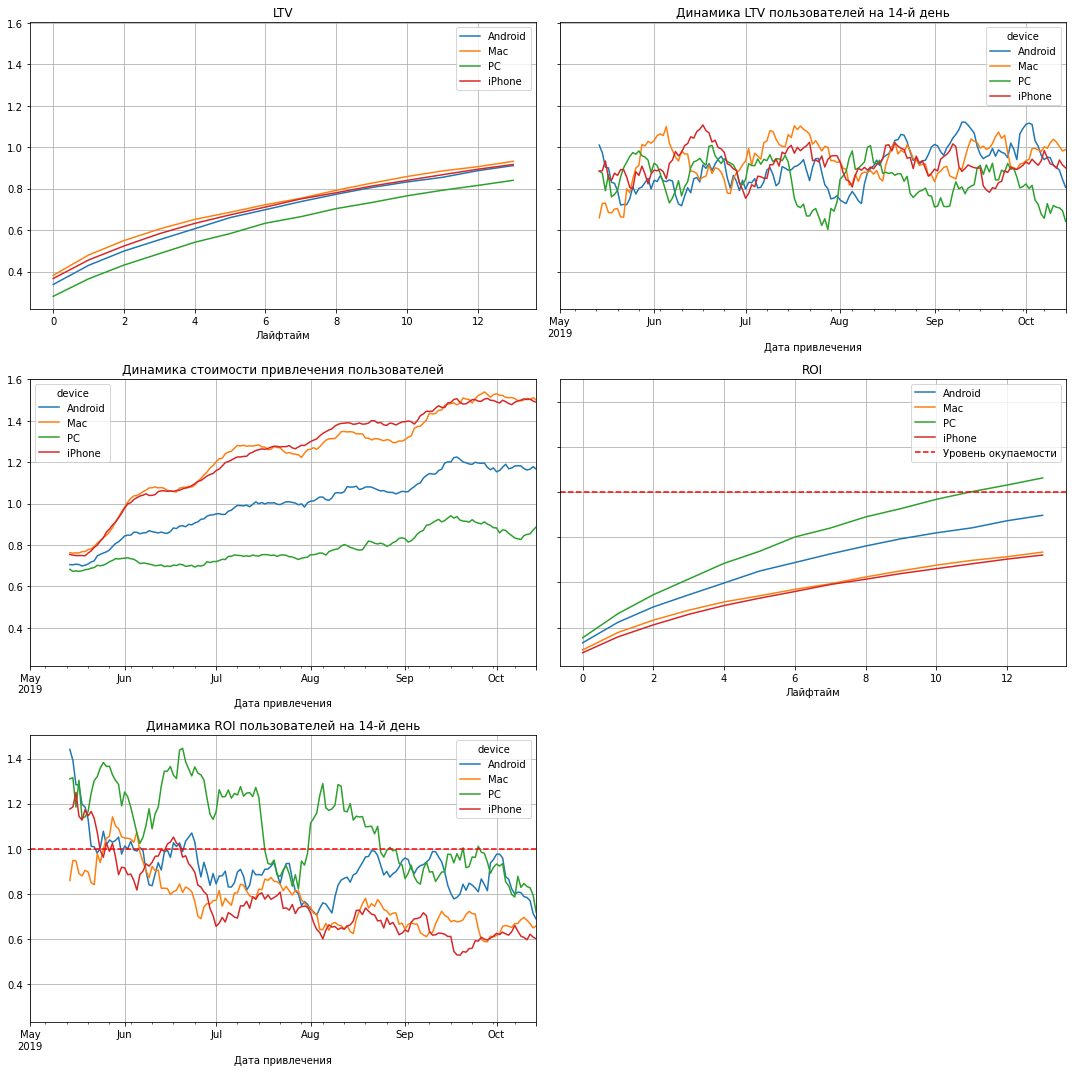

In [30]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать такие выводы:

- LTV стабилен на всех устройствах
- Скачок стоимости привлечения коснулся пользователей всех устройств, однако ROI  превысил уровень окупаемости только на PC
- Динамика ROI показывает, что лучше всех окупались пользователи PC, но к сентябрю пользователи всех устройств перестали и приносить прибыль

#### Окупаемость рекламы с разбивкой по странам

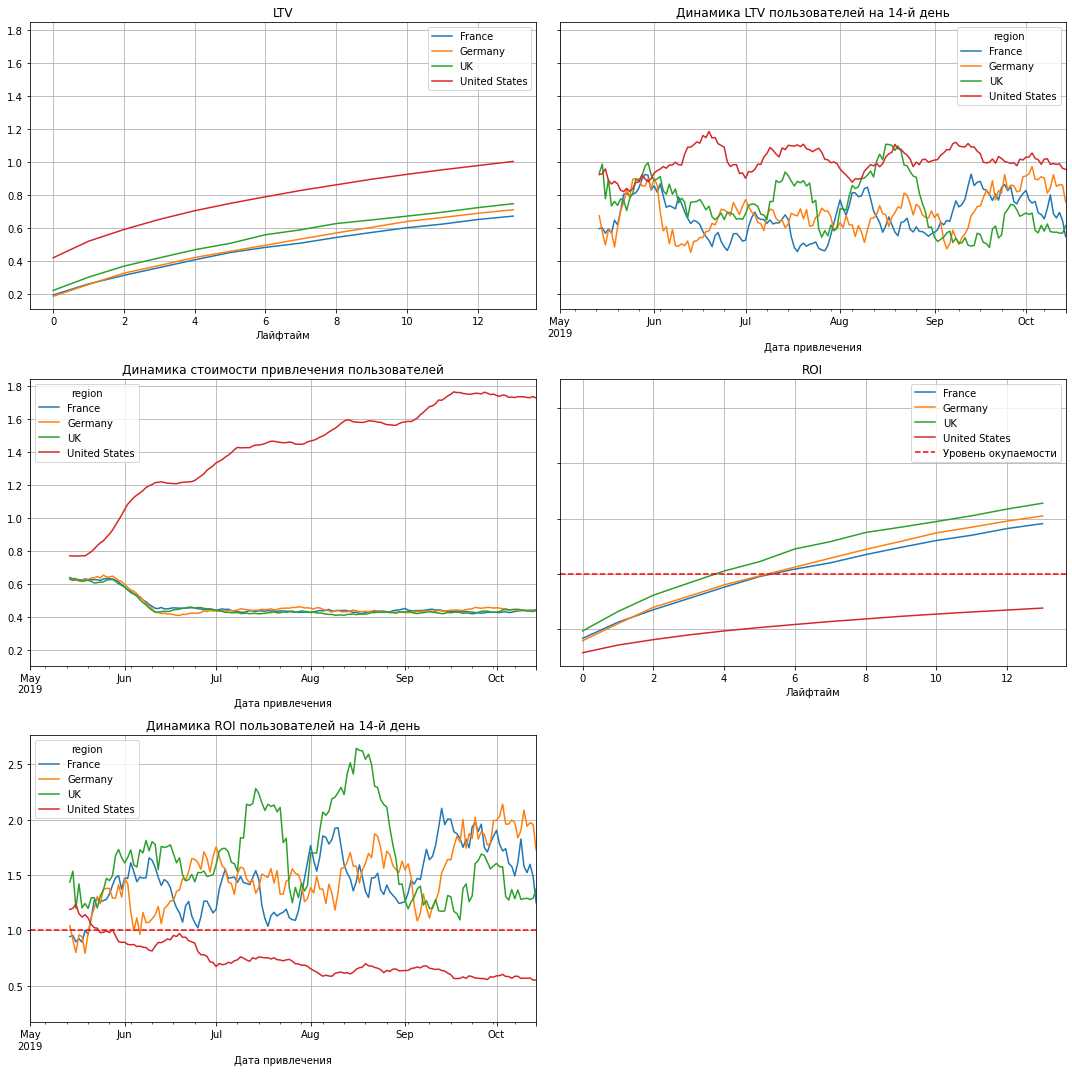

In [31]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Графики показывают, что проблема в пользователях, привлеченных в США. Выручка пользователей США стабильно выше пользователей других стран за счет наибольшего количества пользователей, в то же время ROI не достигает уровня окупаемости

#### Окупаемость рекламы с разбивкой по рекламным каналам

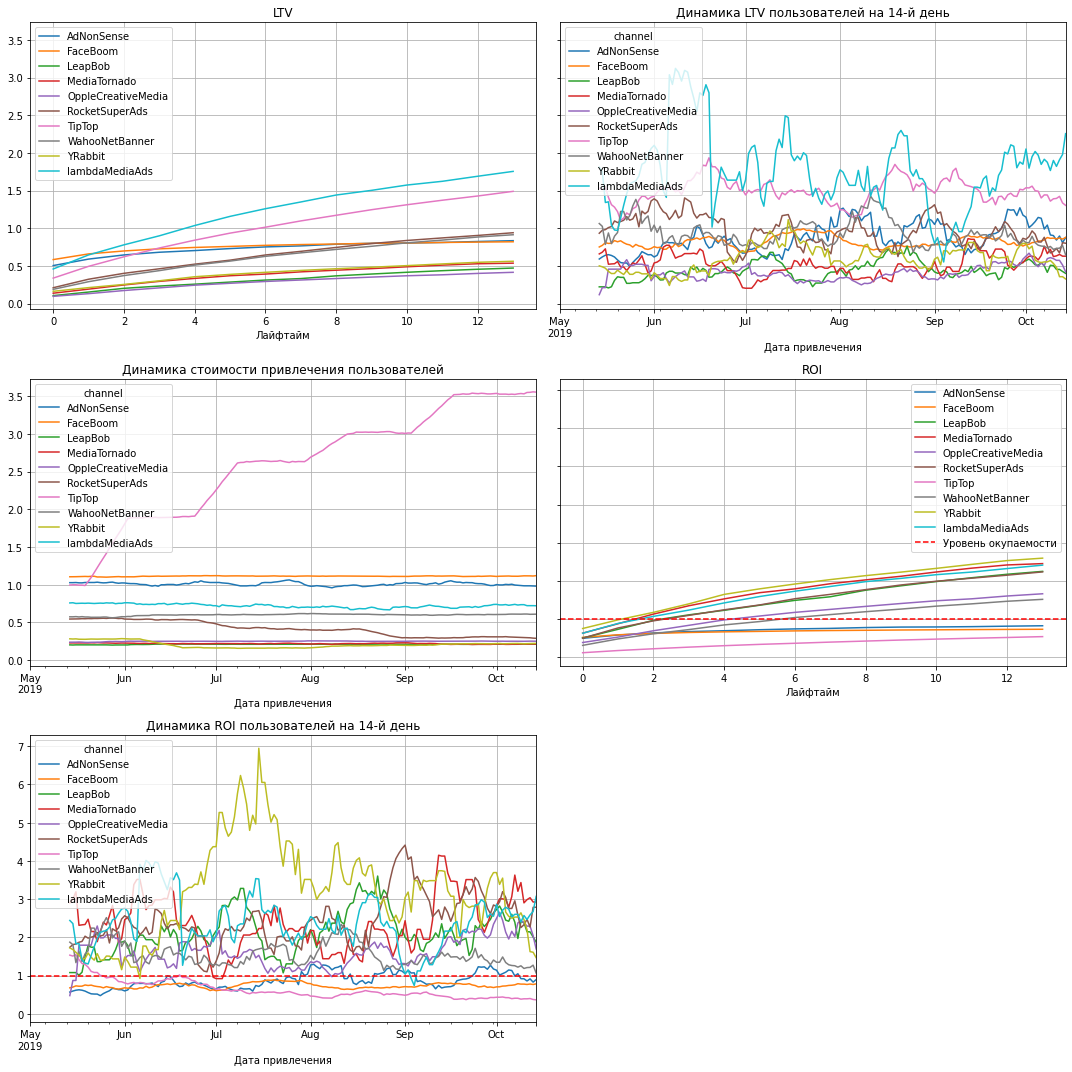

In [32]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- Не окупилась реклама 3 каналов: TipTop, FaceBoom и AdNonSense
- Затраты на рекламу в TipTop постоянно растут, но не окупаются
- Затраты на рекламу в FaceBoom неизменны, как и низкий ROI этого канала

Проблемы окупаемости могут быть вызваны низкой конверсией или удержанием пользователей. Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

#### Конверсия и удержание

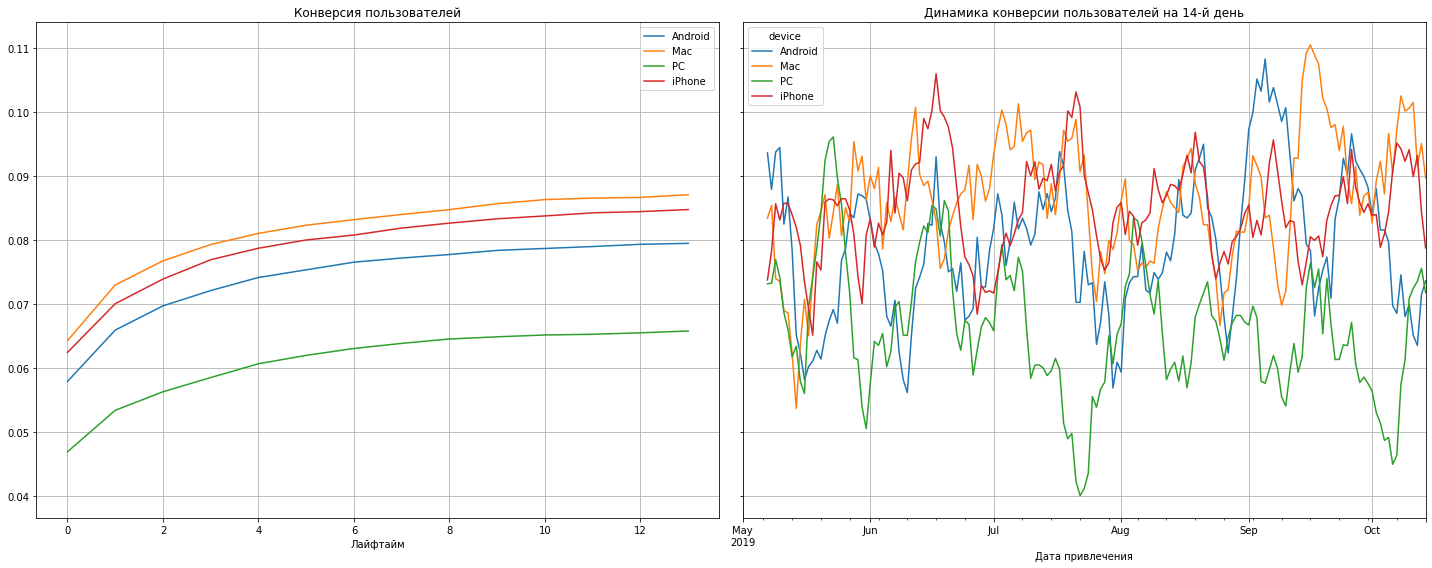

In [33]:
conversion_raw, conversion, conversion_history = get_conversion(
    ad_users,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

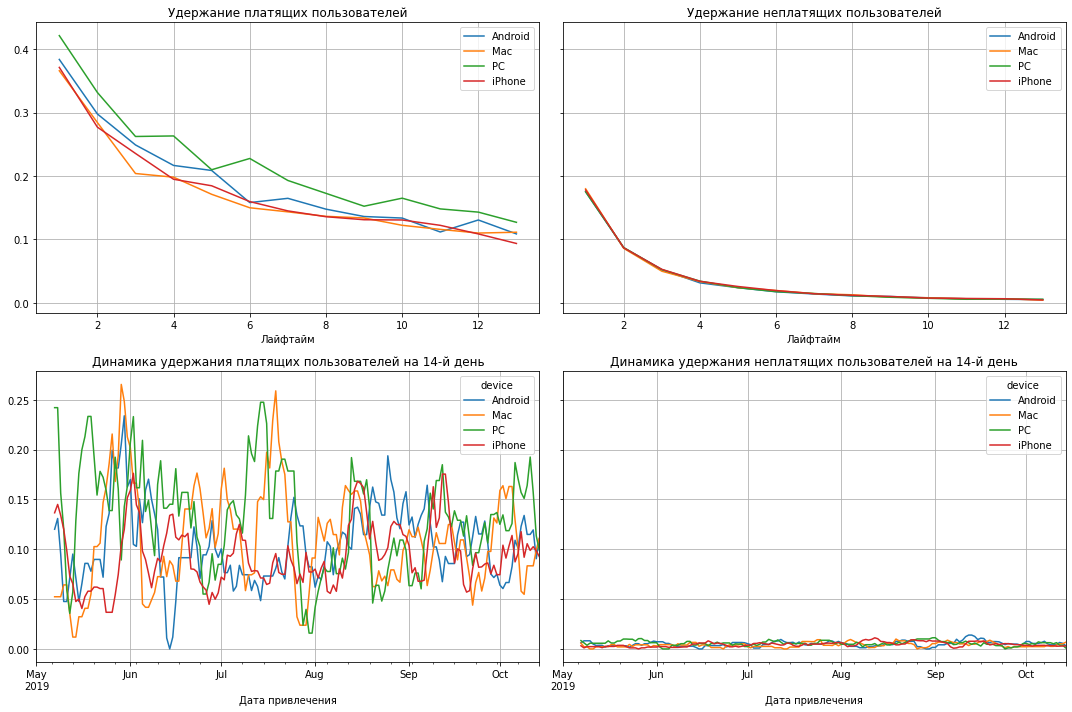

In [34]:
retention_raw, retention, retention_history = get_retention(
    ad_users,
    sessions,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_retention(retention, retention_history, horizon_days, window=7)

Конверсия пользователей PC заметно ниже остальных, в то время, как удержание - наоборот самое высокое. Удержание пользователей стабильно по всем устройствам. 

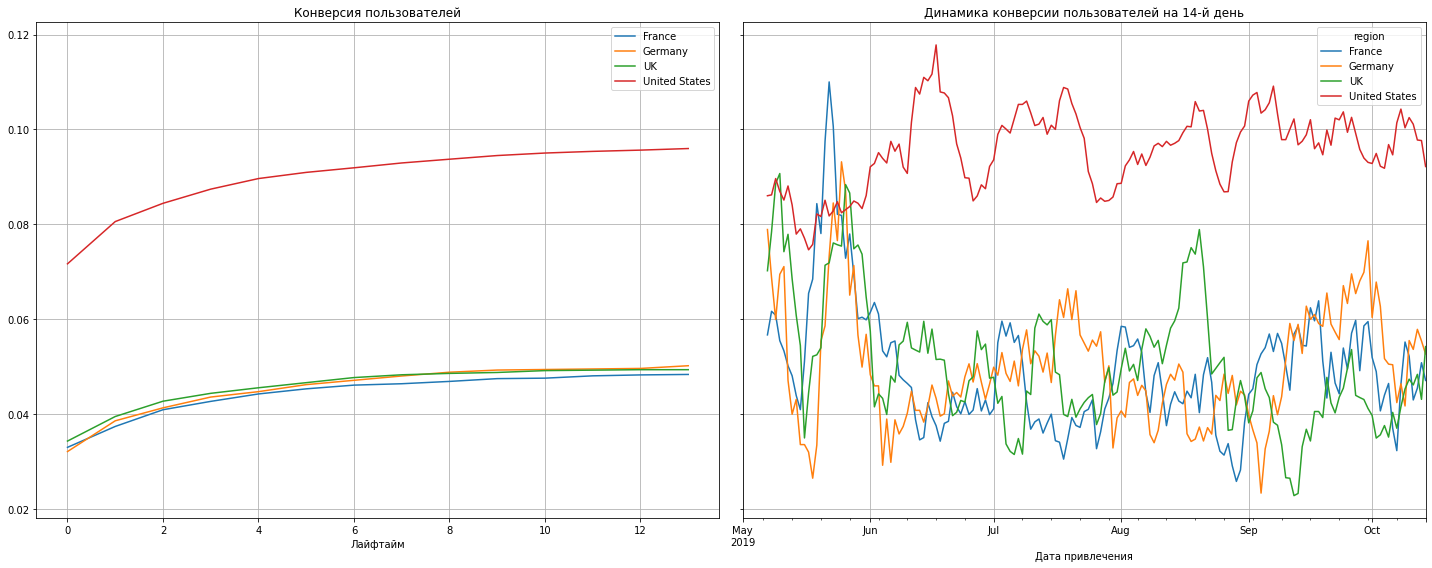

In [35]:
conversion_raw, conversion, conversion_history = get_conversion(
    ad_users,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

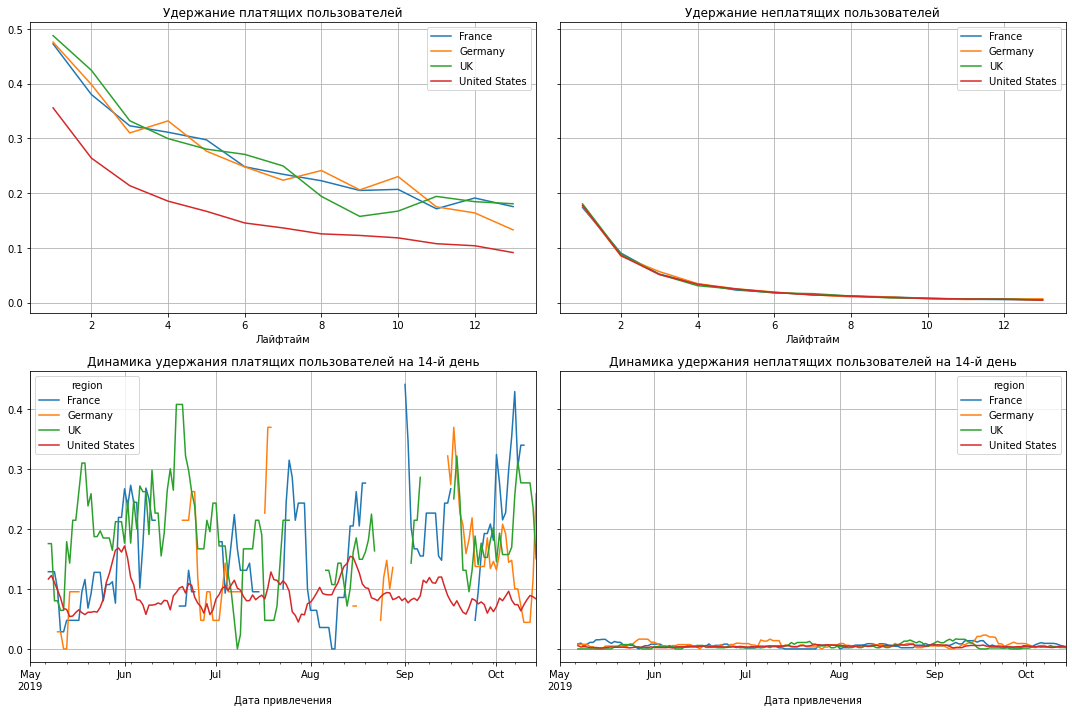

In [36]:
retention_raw, retention, retention_history = get_retention(
    ad_users,
    sessions,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
plot_retention(retention, retention_history, horizon_days, window=7)

Пользователи США стабильно хорошо конвертируются, при этом плохо удерживаются. Европейцы стабильно конвертируются и удерживаются

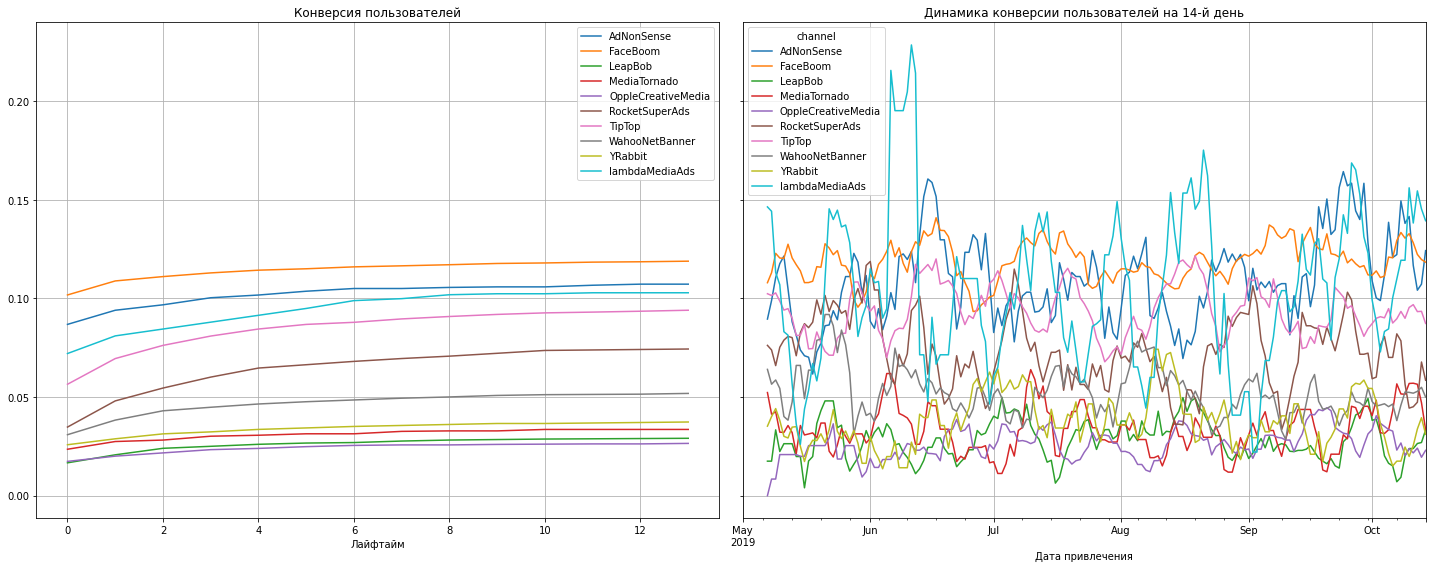

In [37]:
conversion_raw, conversion, conversion_history = get_conversion(
    ad_users,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

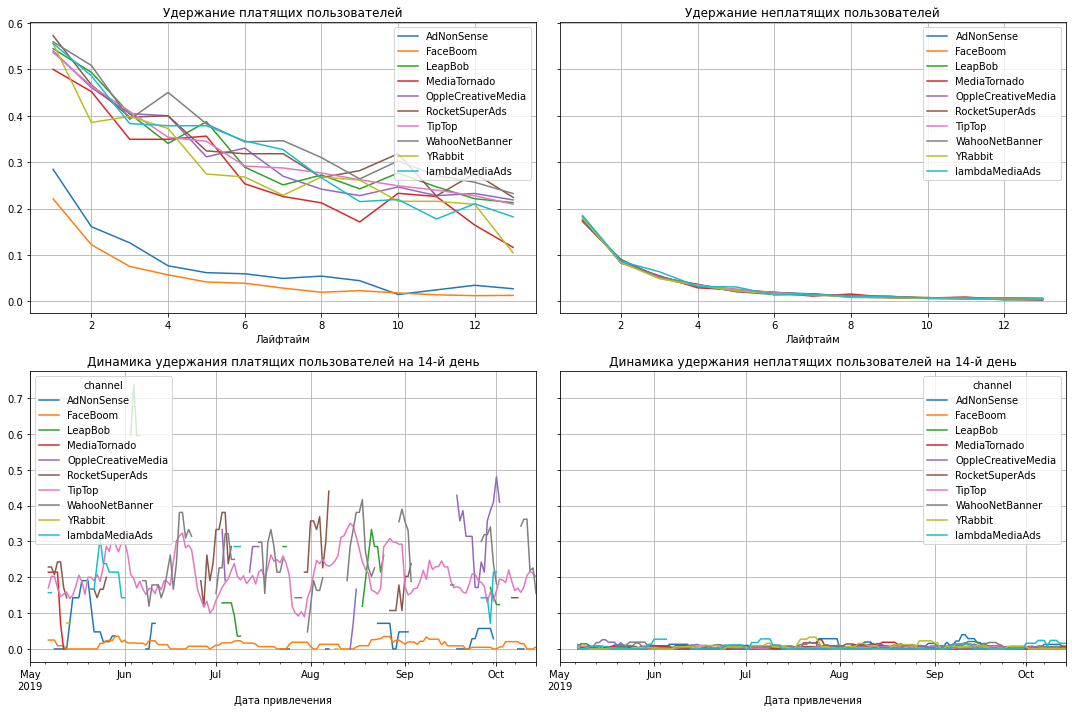

In [38]:
retention_raw, retention, retention_history = get_retention(
    ad_users,
    sessions,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_retention(retention, retention_history, horizon_days, window=7)

Cамая высокая конверсия у пользователей канала FaceBoom и AdNonSense, в то же время график показывает очень низкое удержание. Скорее всего, причина в какой-нибудь технической проблеме. Пользователи TipTop конвертируются хуже, но хорошо удерживаются. В остальных каналах нет проблем с конверсией и удержанием

Удержание неплатящих пользователей из разных каналов, стран, платформ ровное, а удержание платящих сильно отличаетсяВероятно, существует какая-то различная мотивация для платящих пользователей в зависимости от сегмента или количество пользователей платящих существенно ниже и этим объясняется различие

#### Расследование аномалий

Рассмотрим окупаемость без учета пользователей привлеченных через TipTop и FaceBoom

In [39]:
good_channel = ad_users.query('channel != "TipTop" and channel != "FaceBoom"')

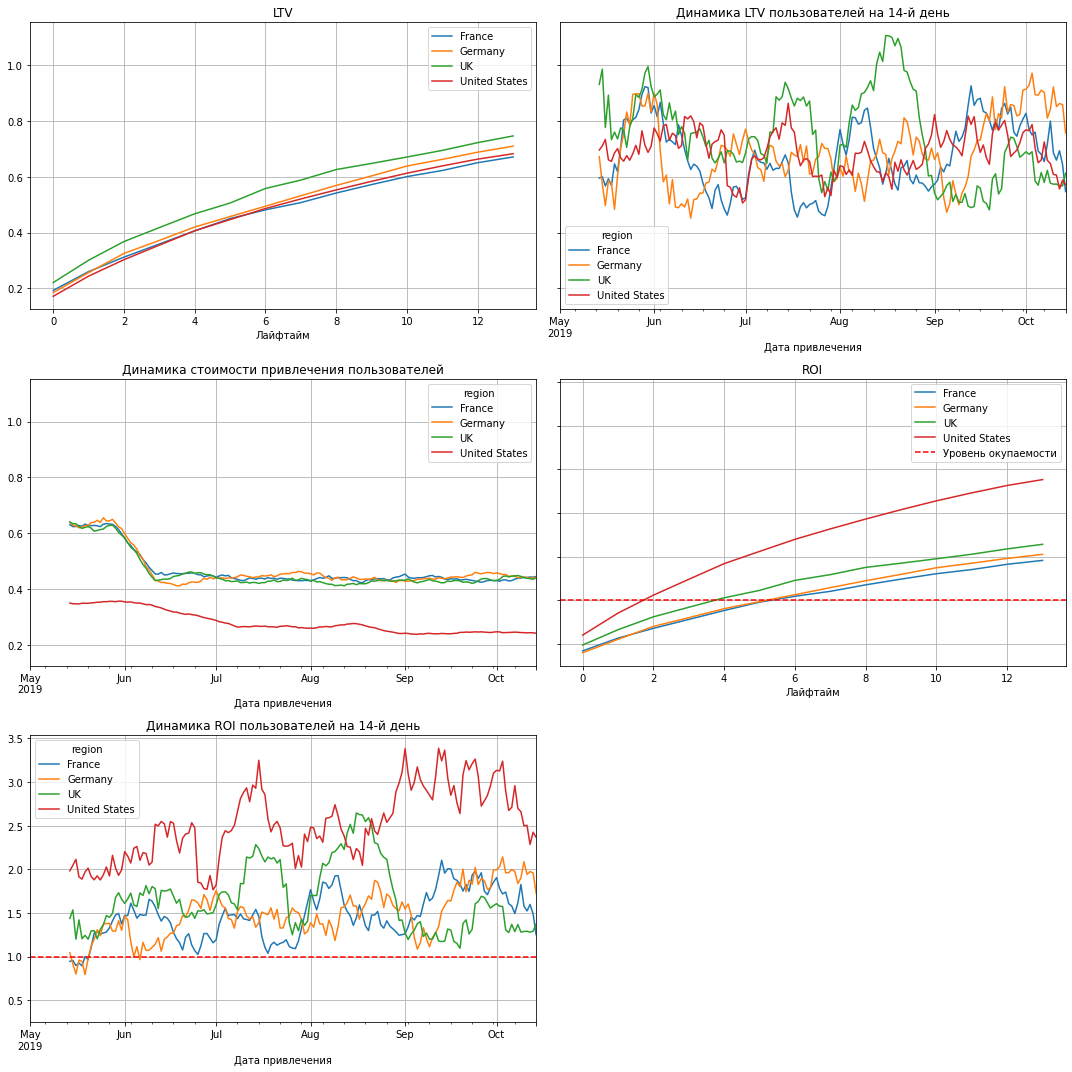

In [40]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    good_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

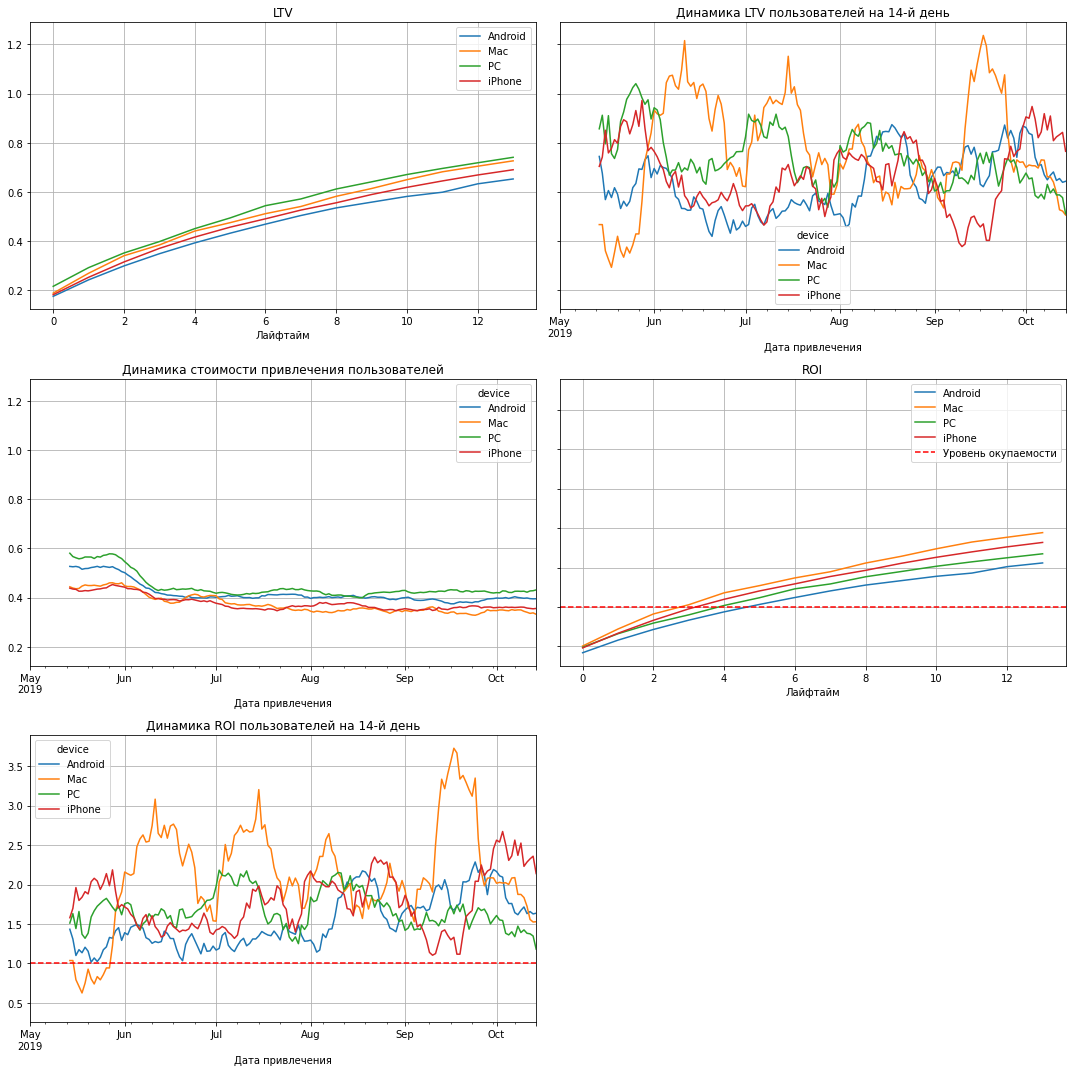

In [41]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    good_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Графики показывают, что реклама окупалась по всем остальным рекламным каналам как с разбивкой по устройствам, так и с разбивкой по регионам. 

Рассмотрим показатели TipTop и FaceBoom

In [42]:
bad_channel = ad_users.query('channel == "TipTop" or channel == "FaceBoom"')

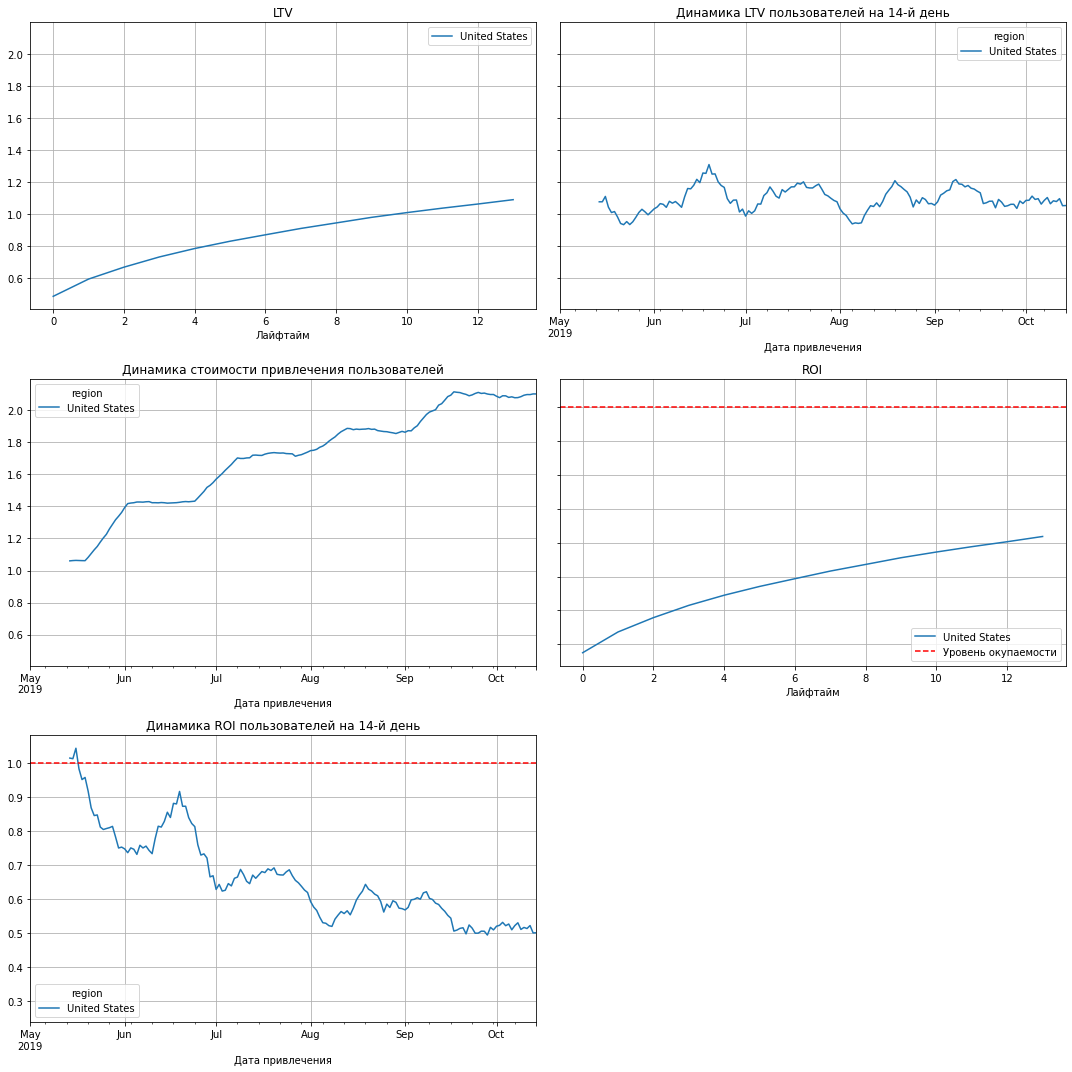

In [43]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    bad_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

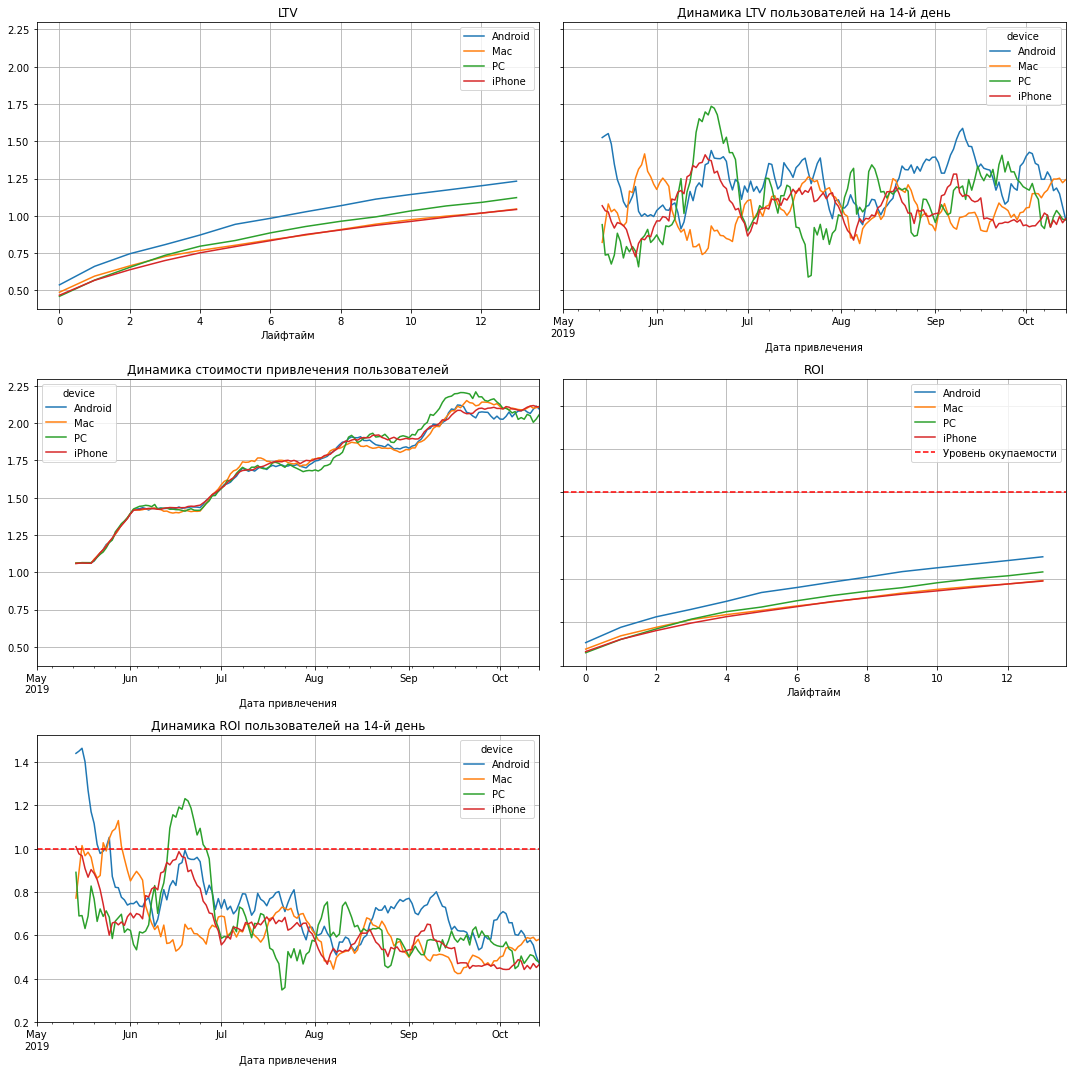

In [44]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    bad_channel, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Как показывают графики через неэффективные каналы приходили только пользователи из США. Так как это основные каналы привлечения, общие данные были сильно искажены. LTV пользователей, пришедших через эти каналы выше, но реклама все равно не окупается из-за постоянно растущих затрат.

#### Вывод

На основе исследования можно сделать вывод, что реклама не окупается в США по пользователям, пришедшим через TipTop и FaceBoom. Постоянно растущие затраты могут быть вызваны большим количеством кликов на рекламный баннер, а плохое удержание с тем, что пользователи могли столкнуться с технической ошибкой в приложении, в результате чего реклама не окупалась

### Вывод


Чаще всего приложением пользуются пользователи из США, пришедшие через TipTop и FaceBoom, на привлечение которых было потрачено 80% от общей суммы рекламных затрат, а также жители Германии, Франции и Великобритании. Приложение доступно на таких устройствах как Mac, iPhone, Android, PC.

В результате исследования было выявлено, что реклама не окупается в США. Неэффективными оказались каналы TipTop, FaceBoom и AdNonSense. Выручка от пользователей, пришедших через TipTop не компенсировала затраты на рекламу, которые постоянно росли в течение всего периода. LTV пользователей, пришедших через FaceBoom и AdNonSense стабильно, но они стабильно плохо удерживались. Вид устройства никак не повлиял на окупаемость.

Рекомендации для отдела маркетинга:

- выявить причины роста затрат на рекламу в TipTop при низком LTV
- выявить причины низкого удержания пользователей, привлеченных через FaceBoom
- рассмотреть возможный отказ от рекламы через AdNonSense, так как реклама не окупалась на протяжении всего периода
- рассмотреть возможность привлечения большего количества пользователей стран Европы, где реклама стабильно окупается
